In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os 

In [6]:
face_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'


In [7]:
face_cascade = cv2.CascadeClassifier(face_cascade_path)


In [15]:
dataset_dir = 'C:/Users/zaema/Downloads/archive/'
output_folder = 'C:/Users/zaema/OneDrive/Desktop/Semester_7/DL/cropped/'

os.makedirs(output_folder, exist_ok=True)


In [9]:
# Loop through all files in the input folder
for filename in os.listdir(dataset_dir):
    if filename!='Readme.txt' and  not filename.endswith('.jpg') :
    
            dst = filename + '.jpg'
            src = os.path.join(dataset_dir, filename)
            dst = os.path.join(dataset_dir, dst)
            os.rename(src, dst)

In [10]:
files = os.listdir(dataset_dir)

# Print the list of files
for file in files:
    print(file)

subject01.centerlight.jpg
subject01.glasses.jpg
subject01.happy.jpg
subject01.leftlight.jpg
subject01.noglasses.jpg
subject01.normal.jpg
subject01.rightlight.jpg
subject01.sad.jpg
subject01.sleepy.jpg
subject01.surprised.jpg
subject01.wink.jpg
subject02.centerlight.jpg
subject02.glasses.jpg
subject02.happy.jpg
subject02.leftlight.jpg
subject02.noglasses.jpg
subject02.normal.jpg
subject02.rightlight.jpg
subject02.sad.jpg
subject02.sleepy.jpg
subject02.surprised.jpg
subject02.wink.jpg
subject03.centerlight.jpg
subject03.glasses.jpg
subject03.happy.jpg
subject03.leftlight.jpg
subject03.noglasses.jpg
subject03.normal.jpg
subject03.rightlight.jpg
subject03.sad.jpg
subject03.sleepy.jpg
subject03.surprised.jpg
subject03.wink.jpg
subject04.centerlight.jpg
subject04.glasses.jpg
subject04.happy.jpg
subject04.leftlight.jpg
subject04.noglasses.jpg
subject04.normal.jpg
subject04.rightlight.jpg
subject04.sad.jpg
subject04.sleepy.jpg
subject04.surprised.jpg
subject04.wink.jpg
subject05.centerlight.jp

In [19]:
print(cv2.__version__)


4.8.1


In [11]:
from PIL import Image


In [16]:
for filename in os.listdir(dataset_dir): 
   if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.gif'):
        # Read the image
        image_path = os.path.join(dataset_dir, filename)
        if os.path.exists(image_path):
            try:
               image_pil = Image.open(image_path)
               if image_pil.mode != 'RGB':
                  image_pil = image_pil.convert('RGB')

               # Convert the Pillow image to a NumPy array (OpenCV format)
               image_cv = np.array(image_pil)
               # Now, you can use the image_cv with OpenCV for further processing
               # For example, convert it to grayscale
               gray = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)
               faces = face_cascade.detectMultiScale(image_cv, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

               # Loop through detected faces and crop them
               for i, (x, y, w, h) in enumerate(faces):
                     # Crop the face from the original image
                     face = image_cv[y:y + h, x:x + w]

                     # Save the cropped face as a new image
                     output_path = os.path.join(output_folder, f'face_{i}_{filename}')
                     cv2.imwrite(output_path, face)
                        

            except Exception as e:
               print(f"Error: Failed to open image - {e}")
print("Cropping faces completed.")


Cropping faces completed.


In [18]:
files = os.listdir(output_folder)

# Print the list of files
for file in files:
    print(file)

face_0_subject01.centerlight.jpg
face_0_subject01.glasses.jpg
face_0_subject01.happy.jpg
face_0_subject01.leftlight.jpg
face_0_subject01.noglasses.jpg
face_0_subject01.normal.jpg
face_0_subject01.rightlight.jpg
face_0_subject01.sad.jpg
face_0_subject01.sleepy.jpg
face_0_subject01.surprised.jpg
face_0_subject01.wink.jpg
face_0_subject02.centerlight.jpg
face_0_subject02.glasses.jpg
face_0_subject02.happy.jpg
face_0_subject02.leftlight.jpg
face_0_subject02.noglasses.jpg
face_0_subject02.normal.jpg
face_0_subject02.rightlight.jpg
face_0_subject02.sad.jpg
face_0_subject02.sleepy.jpg
face_0_subject02.surprised.jpg
face_0_subject02.wink.jpg
face_0_subject03.centerlight.jpg
face_0_subject03.glasses.jpg
face_0_subject03.happy.jpg
face_0_subject03.leftlight.jpg
face_0_subject03.noglasses.jpg
face_0_subject03.normal.jpg
face_0_subject03.rightlight.jpg
face_0_subject03.sad.jpg
face_0_subject03.sleepy.jpg
face_0_subject03.surprised.jpg
face_0_subject03.wink.jpg
face_0_subject04.centerlight.jpg
face

In [19]:

def split_files(path):
    for filename in os.listdir(path):
        if filename.endswith('.jpg'):
            # Split the name of the file to get the subject number
            subject_number = filename.split('_')[2].split('.')[0]

            # Create a new folder for each subject
            subject_folder = os.path.join(path, f'subject{subject_number}')
            if not os.path.exists(subject_folder):
                os.makedirs(subject_folder)

            # Move the file to the new folder
            src = os.path.join(path, filename)
            dst = os.path.join(subject_folder, filename)
            os.rename(src, dst)

# Provide the path to the directory containing your images (e.g., YaleFacesPath)
YaleFacesPath = output_folder

if not os.path.exists(os.path.join(YaleFacesPath, 'subject01')):
    split_files(YaleFacesPath)


In [20]:
#splitting into training and testing datasets
import os
import random
import shutil

# Define the path to your dataset root folder
dataset_root = output_folder

# Define the ratio for training and testing
train_ratio = 0.8  # 80% for training, change as needed

# Iterate through each subject folder
for subject_folder in os.listdir(dataset_root):
    subject_path = os.path.join(dataset_root, subject_folder)

    # Check if it's a directory
    if os.path.isdir(subject_path):
        # List all images in the subject folder
        images = os.listdir(subject_path)

        # Shuffle the list of images
        random.shuffle(images)

        # Calculate the split index based on the defined ratio
        split_index = int(len(images) * train_ratio)

        # Create training and testing folders for the subject
        train_folder = os.path.join(dataset_root, 'train', subject_folder)
        test_folder = os.path.join(dataset_root, 'test', subject_folder)

        os.makedirs(train_folder, exist_ok=True)
        os.makedirs(test_folder, exist_ok=True)

        # Move the selected images to the training folder
        for image in images[:split_index]:
            src = os.path.join(subject_path, image)
            dst = os.path.join(train_folder, image)
            shutil.move(src, dst)

        # Move the remaining images to the testing folder
        for image in images[split_index:]:
            src = os.path.join(subject_path, image)
            dst = os.path.join(test_folder, image)
            shutil.move(src, dst)




In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Define data transformations for normalization and resizing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])




In [23]:
# Load the training dataset
train_dataset = ImageFolder('C:/Users/zaema/OneDrive/Desktop/Semester_7/DL/cropped/train/', transform=transform)
test_dataset = ImageFolder('C:/Users/zaema/OneDrive/Desktop/Semester_7/DL/cropped/test/', transform=transform)

# Print the classes of the training dataset
print(train_dataset.classes)

['subjectsubject01', 'subjectsubject02', 'subjectsubject03', 'subjectsubject04', 'subjectsubject05', 'subjectsubject06', 'subjectsubject07', 'subjectsubject08', 'subjectsubject09', 'subjectsubject10', 'subjectsubject11', 'subjectsubject12', 'subjectsubject13', 'subjectsubject14', 'subjectsubject15']


In [24]:
#create data loaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [25]:
#load a pretrained resnet18 model
model = models.resnet18(pretrained=True)

c:\Users\zaema\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\zaema\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\zaema/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:52<00:00, 890kB/s] 


In [26]:
#modify the last layer
num_classes = len(train_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

#define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [30]:
#training the model
device = torch.device('cpu')

model.to(device)

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_loss / len(train_loader)}")


Epoch 1/10, Loss: 0.2345426813699305
Epoch 2/10, Loss: 0.12638767203316092
Epoch 3/10, Loss: 0.05869380198419094
Epoch 4/10, Loss: 0.04126592865213752
Epoch 5/10, Loss: 0.02454383292933926
Epoch 6/10, Loss: 0.013967511185910553
Epoch 7/10, Loss: 0.003608575163525529
Epoch 8/10, Loss: 0.004922823776723817
Epoch 9/10, Loss: 0.0026222271990263835
Epoch 10/10, Loss: 0.0017264190973946825


In [31]:
#testing the model
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy().tolist())
        y_pred.extend(predicted.cpu().numpy().tolist())

print(f"Test accuracy: {accuracy_score(y_true, y_pred)}")


Test accuracy: 1.0


In [32]:
def imshow(img, title=None):
    img = img / 2 + 0.5  # Unnormalize if you applied normalization during data transformation
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


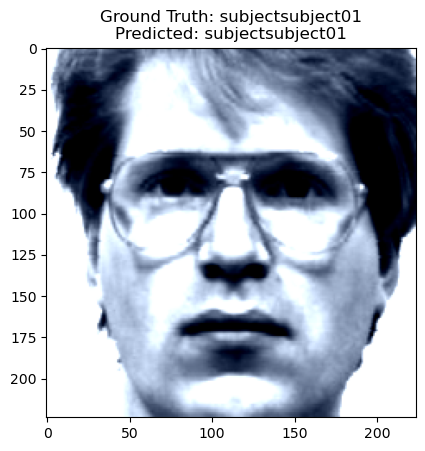

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


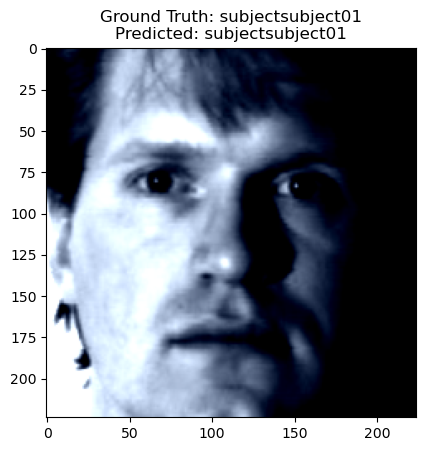

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


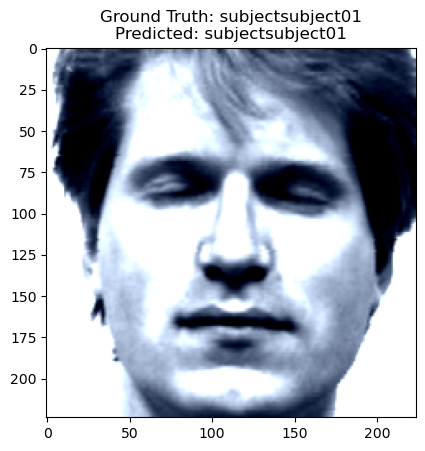

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


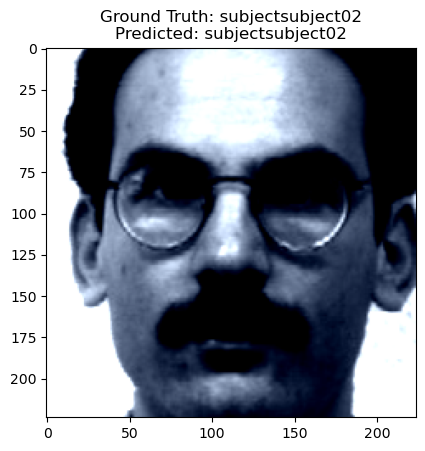

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


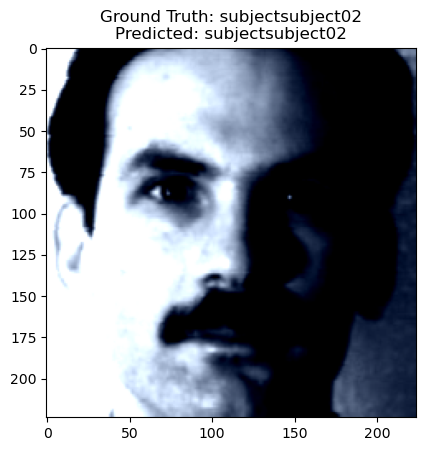

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


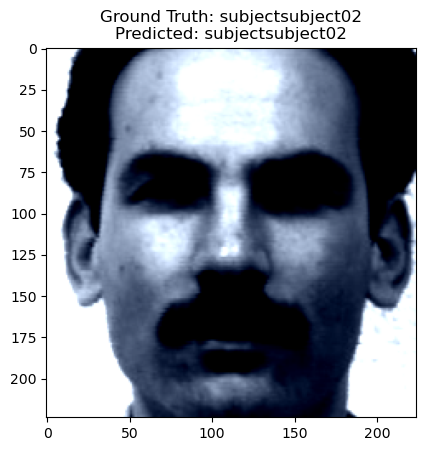

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


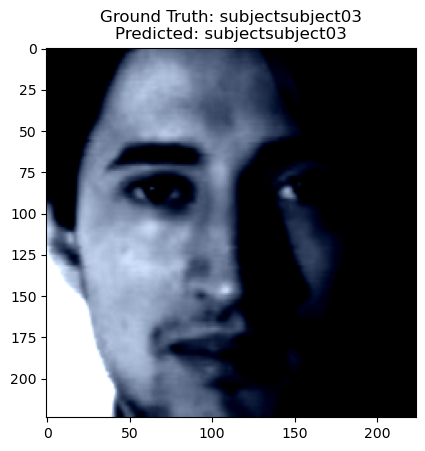

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


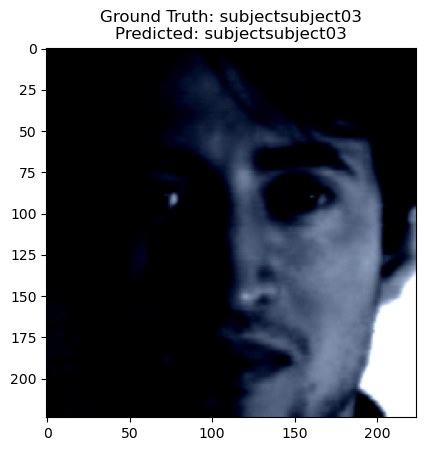

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


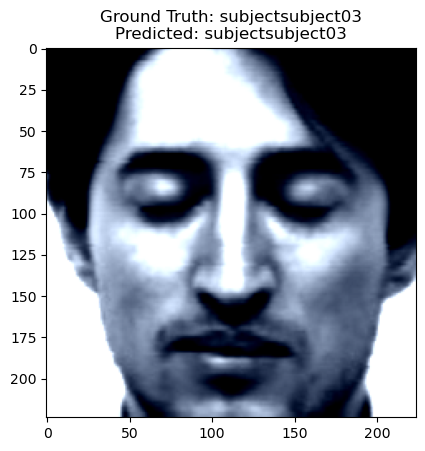

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


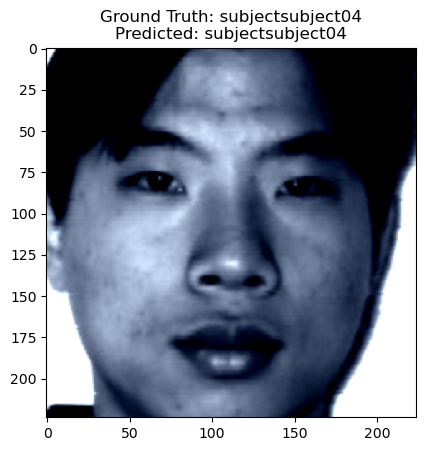

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


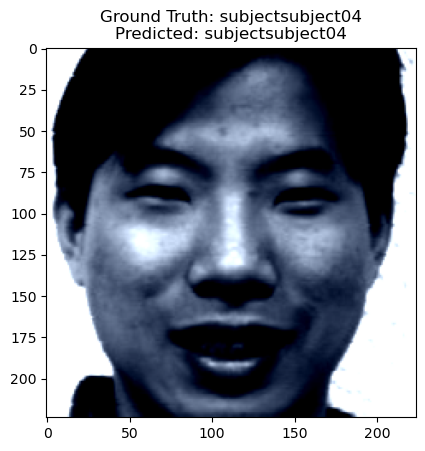

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


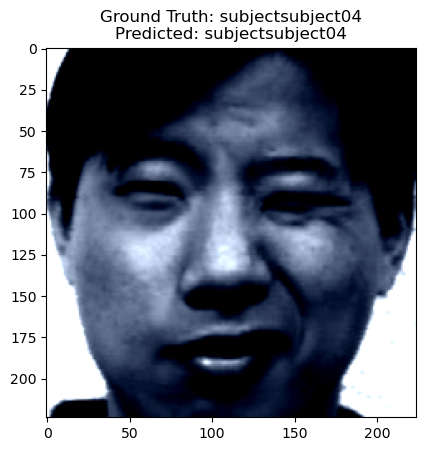

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


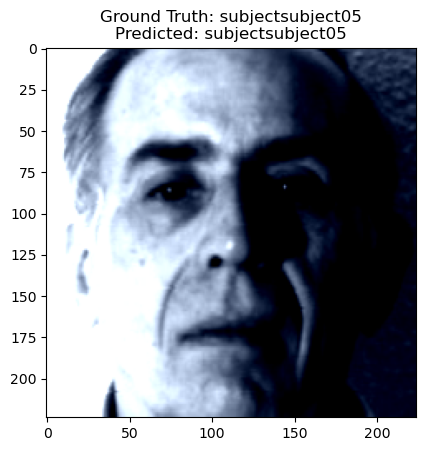

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


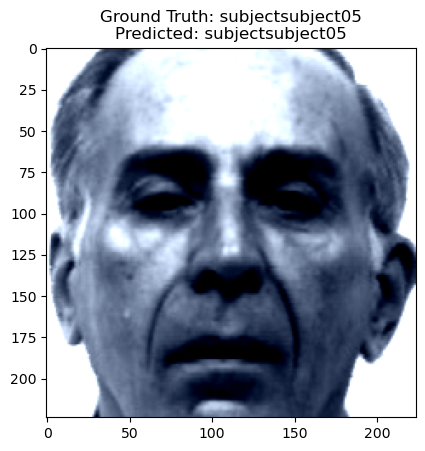

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


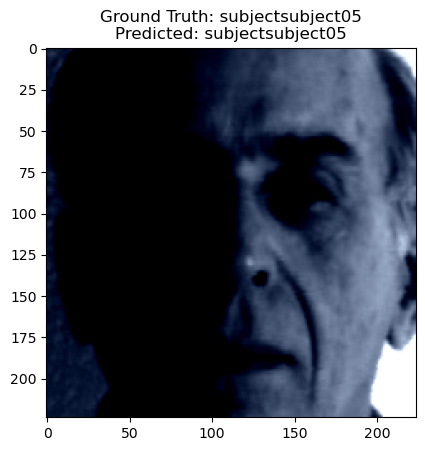

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


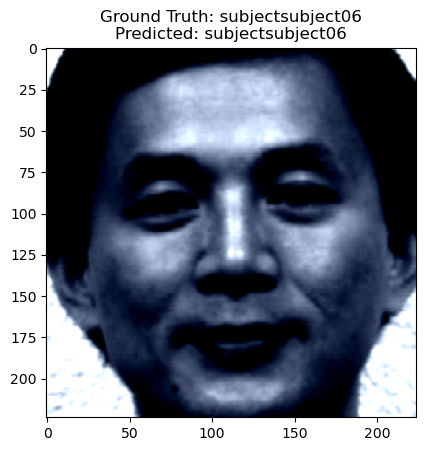

In [33]:
class_names = test_dataset.classes

# Set the model to evaluation mode
model.eval()

# Iterate through the test dataset
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Make predictions
with torch.no_grad():
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Print images with predicted labels
batch_size = len(images)
for i in range(batch_size):
    image = images[i]
    label = labels[i].item()
    prediction = predicted[i].item()
    class_name = class_names[label]

    # Show the image with ground truth and predicted labels
    imshow(image, title=f'Ground Truth: {class_name}\nPredicted: {class_names[prediction]}')

plt.show()